
# Project: Ford GoBike System Data Analysis

## Introduction
> Ford GoBike, previously known as Bay Area Bike Share, is a bike share system currently implemented in San Francisco, East Bay, and San Jose. The data describes all the trips taken from operation's rebranding as Ford GoBike (June 28, 2017) until the end of the year (December 31, 2017).Each trip is anonymized and includes following information:
>> 1. Trip Duration (seconds)<br>
>> 2. Start Time and Date<br>
>> 3. End Time and Date<br>
>> 4. Start Station ID<br>
>> 5. Start Station Name<br>
>> 6. Start Station Latitude<br>
>> 7. Start Station Longitude<br>
>> 8. End Station ID<br>
>> 9. End Station Name<br>
>> 10. End Station Latitude<br>
>> 11. End Station Longitude<br>
>> 12. Bike ID<br>
>> 13. User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)<br>


#### Import the libraries used

In [2]:
import pandas as pd
import numpy as np
import math
from math import radians, sin, cos, acos
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
%matplotlib inline

#### View the data to start assessing it

In [3]:
df=pd.read_csv('2017-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


#### Information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


### Data Wrangling
> ####  Assessing Data: Few questions to assess the given dataset are:<br>
                        >a) Which user_type is accessing the bikes in more amount?<br>
                        >b) Which user_type is using the bikes for more duration?<br>
                        >c) more bikes are used on weekdays/weekends ?<br>
                        >d)which start/end points are mostly preferred by the Users?<br>

> #### Data Cleaning: <br>
                     > Adding one column for the 'Distance' b/w start_station and end_station

In [5]:
def distance(s_lat, s_lng, e_lat, e_lng):
    """Resusable function to calculate the distance in km."""
    # approximate radius of earth in km
    R = 6373.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 

In [6]:
df['distance_km']=distance(df['start_station_latitude'],df['start_station_longitude'],df['end_station_latitude'],df['end_station_longitude'])
df['distance_km']=round(df['distance_km'])

   >Splitting the Timestamp columns to Date and Time and DayOfWeek for extracting more information

In [7]:
df['start_date'] = pd.to_datetime(df['start_time']).dt.date
df['start_time'] = pd.to_datetime(df['start_time']).dt.time
df['end_date'] = pd.to_datetime(df['end_time']).dt.date
df['end_time'] = pd.to_datetime(df['end_time']).dt.time

In [8]:
df['start_day']=pd.to_datetime(df['start_date']).dt.weekday_name
df['end_day']=pd.to_datetime(df['end_date']).dt.weekday_name

   > Creating new column - 'booked_days_count' for the number of days between picking up the bike and returning the bike

In [9]:
df['booked_days_count']= (df['end_date']-df['start_date']).dt.days

> Converting 'duration_sec' to hours for better visualisation

In [10]:
df['duration_hour']=round(df['duration_sec']/60)
df['duration_hour'].value_counts().sort_index()

1.0        1635
2.0        9587
3.0       19917
4.0       29841
5.0       34711
          ...  
1435.0        1
1436.0        1
1437.0        2
1438.0        2
1439.0        3
Name: duration_hour, Length: 1219, dtype: int64

#### Validating the dataset after cleaning 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 20 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
distance_km                519700 non-null float64
start_date                 519700 non-null object
end_date                   519700 non-null object
start_day                  519700 non-null object
end_day                    519700 non-

In [12]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,distance_km,start_date,end_date,start_day,end_day,booked_days_count,duration_hour
0,80110,16:57:39.654000,15:12:50.245000,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1.0,2017-12-31,2018-01-01,Sunday,Monday,1,1335.0
1,78800,15:56:34.842000,13:49:55.617000,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,3.0,2017-12-31,2018-01-01,Sunday,Monday,1,1313.0
2,45768,22:45:48.411000,11:28:36.883000,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,0.0,2017-12-31,2018-01-01,Sunday,Monday,1,763.0
3,62172,17:31:10.636000,10:47:23.531000,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,1.0,2017-12-31,2018-01-01,Sunday,Monday,1,1036.0
4,43603,14:23:14.001000,02:29:57.571000,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1.0,2017-12-31,2018-01-01,Sunday,Monday,1,727.0


## Exploratory Data Analysis

> ### Univariate Plots
> #### Question1: Let's start our exploration by looking at variable: user_type. Which user_type is more in number?

In [13]:
df['user_type'].value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

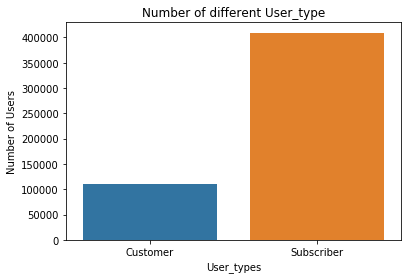

In [14]:
sns.countplot(data=df,x='user_type');
plt.title('Number of different User_type');
plt.xlabel('User_types');
plt.ylabel('Number of Users');


> #### Based on the above graph, we can say that:
    > 1. There are more number of Subscribers than Customers using the bikes.<br>
    > 2. Number of Subscribers are 409230 and Customers are 110470.<br>
> #### Question 2: Is the distribution of variable 'duration_hour' skewed or symmetric?

In [15]:
df['duration_hour'].value_counts().sort_index()

1.0        1635
2.0        9587
3.0       19917
4.0       29841
5.0       34711
          ...  
1435.0        1
1436.0        1
1437.0        2
1438.0        2
1439.0        3
Name: duration_hour, Length: 1219, dtype: int64

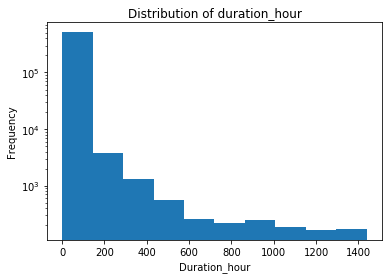

In [16]:
plt.hist(x=df['duration_hour'],log=True);
plt.title('Distribution of duration_hour');
plt.xlabel('Duration_hour');
plt.ylabel('Frequency');

>#### Based on the above graph, we can say that: 
> Histogram is right skewed, it means the usage by the users for long time is less in number.
> #### Question 3: Exploring the variable 'start_day', On Which day more bikes are used?

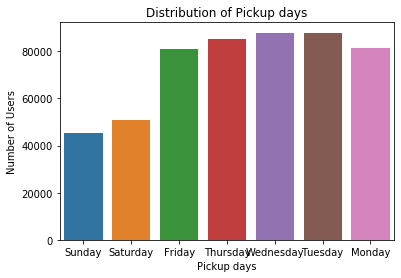

In [17]:
sns.countplot(data=df,x='start_day')
plt.title('Distribution of Pickup days');
plt.xlabel('Pickup days');
plt.ylabel('Number of Users');

> #### Based on the graph, we can say that:
> More number of Users have used the bikes on Tuesday and Wednesday
> #### Question 4: Exploring 'booked_days_count'. Are bikes booked for more number of days or return on same day?

In [18]:
df['booked_days_count'].value_counts()

0    517646
1      2054
Name: booked_days_count, dtype: int64

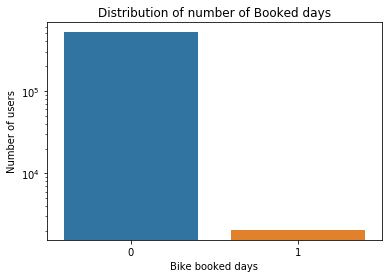

In [19]:
sns.countplot(x=df['booked_days_count'],log=True);
plt.title('Distribution of number of Booked days');
plt.xlabel('Bike booked days');
plt.ylabel('Number of users');

> #### Based on the above graph, we can say that:
> More Users must have returned the bikes on same day which they took the bike.

> #### Question5: Explore variable: 'distance_km'.Is the distribution skewed or normal?

In [20]:
df['distance_km'].value_counts().sort_index()

0.0      42743
1.0     241834
2.0     156615
3.0      52107
4.0      19370
5.0       5380
6.0       1206
7.0        306
8.0         63
9.0          8
10.0         3
11.0        22
12.0         9
13.0         9
14.0         5
15.0         8
16.0         3
17.0         5
62.0         2
68.0         2
Name: distance_km, dtype: int64

C:\Users\hp1\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


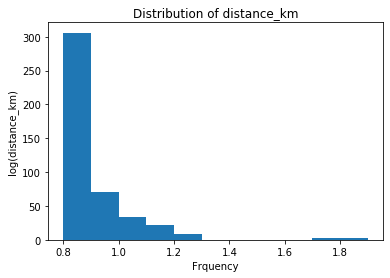

In [21]:
dist=df['distance_km']
log_data = np.log10(dist) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges);
plt.title('Distribution of distance_km');
plt.xlabel('Frquency');
plt.ylabel('log(distance_km)');

> #### Based on the above graph, we can say that:
       > Graph is skewed.<br>
       >Large distances are covered by very less number of people, Users have booked the bikes mostly for short distances.

> ### Bivariate Plots
As we looked at univariate distribution of five features- user_type, duration_sec, booked_count_days, start_day, distance(in km), in the GoBike Dataset.Now we'll investigate relationships between these variables.
> ### Analysis 1: 
>Graph for user_type with other variables - duration_hour,booked_count_days, start_day, distance_km.What kind of shape does the relationship between these variables take?

> #### Question 1: Which usertype uses the bikes for more duration?

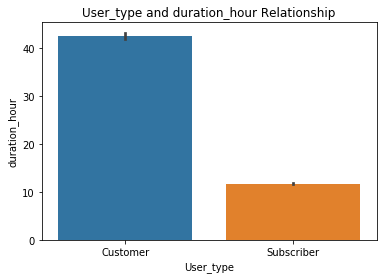

In [22]:
#user_type vs duration_sec (qual vs quant)
base_color = sns.color_palette()[0]
sns.barplot(data = df, x = 'user_type', y = 'duration_hour')
plt.title('User_type and duration_hour Relationship');
plt.xlabel('User_type');
plt.ylabel('duration_hour');

> #### Based on the above graph, we can say that:
    > Customers have booked the bikes for more duration than Subscribers.
> #### Question2: Which user_type have more booking days?

In [23]:
df.groupby('user_type')['booked_days_count'].value_counts()

user_type   booked_days_count
Customer    0                    109233
            1                      1237
Subscriber  0                    408413
            1                       817
Name: booked_days_count, dtype: int64

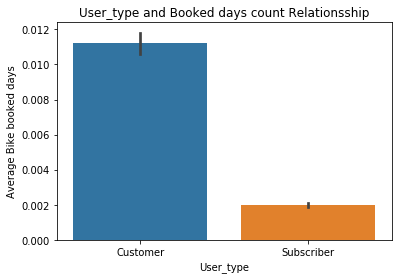

In [24]:
#user_type vs booked_count_days (qual vs quant)
sns.barplot(data = df, x = 'user_type', y = 'booked_days_count');
plt.title('User_type and Booked days count Relationsship');
plt.xlabel('User_type');
plt.ylabel('Average Bike booked days');

> #### Based on the above graph, we can say that:
> More number of Customers have not returned the bikes on same day than the number of Subscribers.

> #### Question3: Which day is mostly preferred by the users(Customer/Subscriber) for the pickup of the bikes?

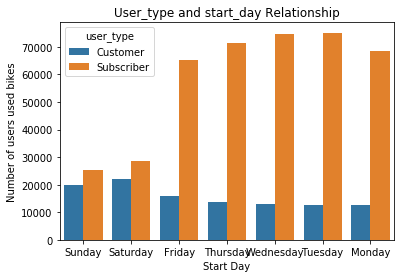

In [25]:
#user_type vs start_day (qual vs qual)
sns.countplot(data = df, hue = 'user_type', x = 'start_day');
plt.title('User_type and start_day Relationship');
plt.xlabel('Start Day');
plt.ylabel('Number of users used bikes');

> #### Based on the above graph, we can say that 
> Subscribers have mostly picked up bikes on Tuesdays and Wednesdays and Customers have mostly picked up bikes on Saturday and Sundays.

> #### Question4: Which user type uses the bikes for longer distances?

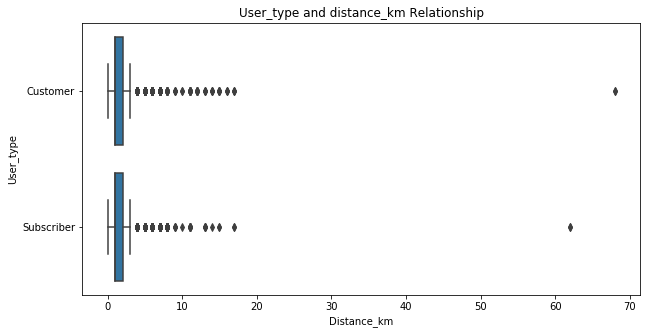

In [26]:
#user_type vs distance(in km) (qual vs quant) Box Plot
plt.figure(figsize = [10, 5])
base_color = sns.color_palette()[0]
ax1 = sns.boxplot(data = df, y= 'user_type', x = 'distance_km', color = base_color);
plt.ylim(ax1.get_ylim());
plt.title('User_type and distance_km Relationship');
plt.xlabel('Distance_km');
plt.ylabel('User_type');

> #### Based on the graph, we can say that:
> Both Subscriber and Customer have used for similar distances on average with one outlier for each user type i.e with distance in range of 60 to 70 km

> ### Analysis2:
> Graph for start_day with variable distance_km, for exploring the distribution
> #### Question : Graph for start_day with variable distance_km.On which days users have covered more distances?

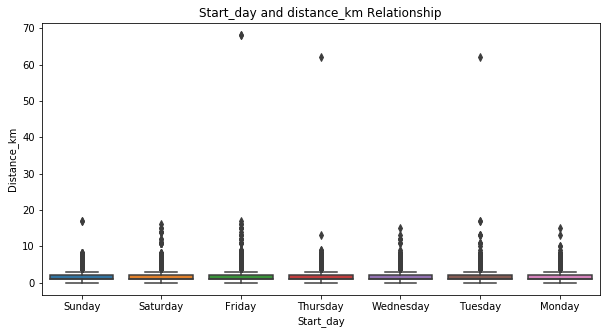

In [27]:
#start_day vs distance(in km) (qual vs quant)
plt.figure(figsize=(10,5))
sns.boxplot(x='start_day',y='distance_km', data=df);
plt.title('Start_day and distance_km Relationship');
plt.xlabel('Start_day');
plt.ylabel('Distance_km');

> #### Based on the above graph, we can say that:
> Few distances are exceeding the normal range of distances i.e. 0 to 20 km which are on weekdays(Friday,Thursday,Tueday).

> ### Analysis3:
>  Graph for duration_hour with other variables -booked_count_days, distance_km.What kind of shape does the relationship between these variables take?

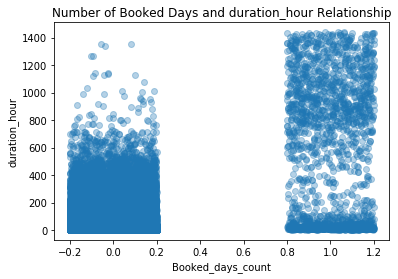

In [28]:
#duration_hour vs booked_days_count
sns.regplot(data = df, x= 'booked_days_count', y= 'duration_hour', fit_reg = False,
            x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});
plt.title('Number of Booked Days and duration_hour Relationship');
plt.xlabel('Booked_days_count');
plt.ylabel('duration_hour');

> #### Based on the above graph, we can say that:
> Graph is dense for less number of booking days, whereas the graph is less dense for more booking days.
> #### Question2: Whether Longer distances are covered if the booking is done for longer duration ov vice versa?

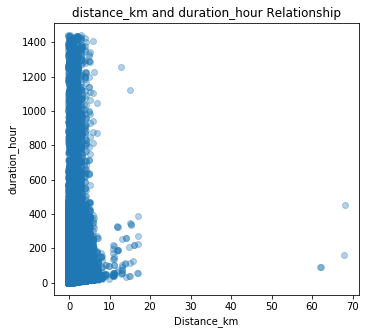

In [29]:
#duration_hour vs distance_km
plt.figure(figsize = [12, 5])
plt.subplot(1, 2, 1)
sns.regplot(data = df, x= 'distance_km', y= 'duration_hour', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});
plt.title('distance_km and duration_hour Relationship');
plt.xlabel('Distance_km');
plt.ylabel('duration_hour');

> #### Based on the above graph, we can say that:
> Users have used bikes for more duration for shorter distances range 0 to 10 km approx. 0 km here means that Starting and End Points are same.

> ### Multivariate Plots
> We saw that Customers have booked bikes for more duration than the Subscriber though there are more number of subscribers present.<br>We also saw that Customers have booked during weeekends whereas Subscribers have booked during weekdays and there was inverse relation between distance and duration as most of the users have used the bikes for same starting and end points.
Now we will depict the interactions with more clarity using three variables together.

> ##### We will explore the variables user_type, start_day, duration_hour, distance_km, booked_days_count for multivariate distribution
> #### Question1: Explore the variables user_type,distance_km,booked_days_count.Which user has used the bike for longer distance during the booking period

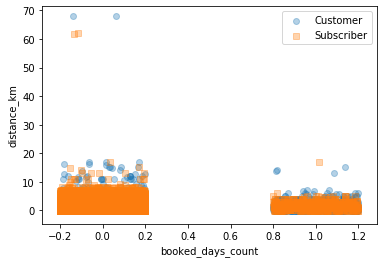

In [30]:
cat_markers = [['Customer', 'o'],
               ['Subscriber', 's']]

for cat, marker in cat_markers:
    df_cat = df[df['user_type'] == cat]
    #plt.scatter(data = df_cat, x = 'booked_days_count', y = 'distance_km', marker = marker)
    sns.regplot(data = df_cat, x= 'booked_days_count', y= 'distance_km', fit_reg = False,marker=marker,
                x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.legend(['Customer','Subscriber'])


> #### Based on the graph,we can say that:
> Customer has covered longer distances as compared to subscribers.

> #### Question2:Explore the variables user_type,start_day,duration_hour.Which User_type have used bikes for more duration for shorter distances, as found in the bivariate plot?

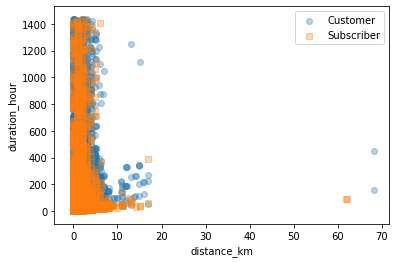

In [31]:
cat_markers = [['Customer', 'o'],
               ['Subscriber', 's']]

for cat, marker in cat_markers:
    df_cat = df[df['user_type'] == cat]
    sns.regplot(data = df_cat, x= 'distance_km', y= 'duration_hour', fit_reg = False,marker=marker,
                x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
plt.legend(['Customer','Subscriber'])


> #### Based on the above graph, we can say that:
> Both Customer and Subscriber have covered short distances but have booked bikes for longer duration.
>Few of customers as on outlier have covered longer distances and have booked bikes for short span only.

> #### Question3: Explore variables 'start_day','duration_hour', 'distance_km'.On which days users pickedup for longer distance and longer durations?

C:\Users\hp1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


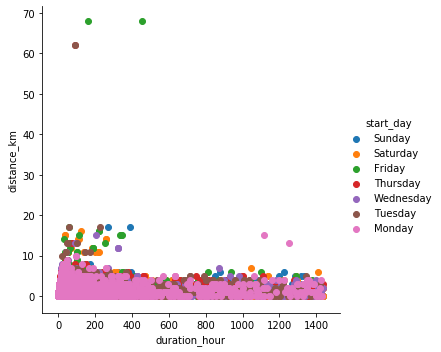

In [32]:
g = sns.FacetGrid(data = df, hue = 'start_day', size = 5)
g.map(plt.scatter,'duration_hour', 'distance_km')
g.add_legend()

> #### Based on the graph above, we can say that:
> Only few users have pickedup bikes on Monday for longer distance and longer durations.
>Longer distances have been covered on Friday with less duration of time.

> #### Question4: Which user has covered longer distances and which day?

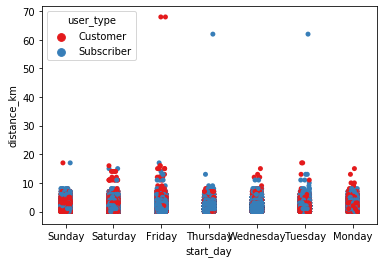

In [33]:
sns.stripplot(x="start_day",y="distance_km",data=df,jitter=True,hue='user_type',palette='Set1')

> #### Based on the above graph, we can say that: 
> Few Customers on Friday have covered longer distances and few Subscribers have covered longer distances on Thurday and Tuesday.

## Explanatory Data Analysis

### Summary

> ##### Main findings include:<br>

1. Out of total number of bike users, 409230 are Subscribers and 110470 Customers.<br>
2. Subscribers have mostly picked up bikes on Tuesdays and Wednesdays, Customers have mostly picked up bikes on Saturday and Sundays.<br>
3. More number of Customers have returned the bikes on next day, which shows that they have kept bikes for longer duration than the number of Subscribers.<br>
4. Few Customers have covered long distance on Friday for short duration of time and few Subscribers have covered long distance on Thurday and Tuesday with long duration of time.<br>
5. Both Customer and Subscriber have covered short distances( refer to the same start and end points calculated as 0 km in the analysis) but have booked bikes for longer duration. Few of customers  have covered longer distances and have booked bikes for short duration only.<br>

6. Both Subscriber and Customer have used bikes for shorter distances range 0 to 10 km approx.(0 km here means that Starting and End Points are same).<br>





## Resources
> 1. Referred for making multivariate plots - https://datascienceplus.com/seaborn-categorical-plots-in-python/ 
> 2. Plottting regplot - https://seaborn.pydata.org/generated/seaborn.regplot.html
> 3. For Axes transformation - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylim.html